# Python Basics - Distinguishing Comments from Code

Python is an interpreted language that will look and feel quite similar to Matlab.  However, it is has it's peculiarities.  To gain some brief familiarity with Python let's do a few activitives.  First, it is important to be able to distinguish from code and comments.  Comments can be identified by the pound sign:

where you can write whatever


In [2]:
# This is a comment.
"""
asdfsd sfddsfdsf

"""

'\nasdfsd sfddsfdsf\n\n'

The alternative to a comment is actual Python code.  For example, a variable, a, can be set to 2 by specifying:

In [5]:
a = 2.0 

To view the value of a have Python print it to the console by using the print statement

In [6]:
#print a #Python 2
print(a) #Python3

2.0


# Markdown is pretty cool

If you are familar with $\LaTeX$ then you can make equations
$$
  y = \int_0^1 \sin^2 x \, dx
$$
This can help you explain code segments in a format that is much easier to read.  You can learn ways to make more equations at this [LaTeX Wiki](https://en.wikibooks.org/wiki/LaTeX/Mathematics) or just Google latex help (which may generate some pretty strange results at first until your browser gets to know you better). 

In [7]:
#f = integrate(sin(x)*sin(x), x, 0, 1)

# Python Basics - Looping and Logic

The advantage of computers is they can do many calculations in a short amount of time.  And they can also evaluate some basic logical arguments (and, or, equality).  For example, the values from 1 to 10 can be printed to the terminal with the following loop.

In [9]:
for i in range(10):
    print(i, i+1)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10


Notice that Python (like C, the language on which Python is built), begins counting at 0 instead of 1.  This will likely cause Matlab users some grief.  

Also, while it is not obvious, in Python indentation matters.  For example

In [16]:
for i in range(10):
    print(i+1)
a = 3


1
2
3
4
5
6
7
8
9
10


will throw an indentation error.  

Logical statements can also be evaluated.  For example, equality can be tested with the following code segment

In [17]:
a = 1
b = 2
# Check if a is equal to b
if (a == b):
    print("a equals b")
# If a is not equal to be then check if a is less than b
elif (a < b):
    print("a=%d is less than b=%d"%(a, b)) # This is a formatted print statement followed by a comment
# If a is not equal to be and is not less than b, then it is good practice to have a catch-all
else:
    # A consequence of the indentation rule is my comment must be indented as well
    print("a=%d is greater than b=%d"%(a, b))


a=1 is less than b=2


# Python Basics - Importing Tools

The strength of Python is that it isn't particularly good at anything!  Consequently, Python has developed a strategy of easily incorporating outside tools (packages, libraries).  Two modules that will be used extensively in this class will be [SciPy](https://www.scipy.org/) which contains [Numpy](https://www.numpy.org) and [ObsPy](https://docs.obspy.org/).  As a simple example, the sine of three numbers will be computed.

In [20]:
from numpy import linspace
from numpy import sin
from numpy import pi
# Compute the 100 x abscissas from [0,2pi] at which the sin will be calculated
x = linspace(0, 2*pi, 100)
# Notice that Python `vectorizes' and will automatically apply the sin operation to every
# element of the array x.
sinx = sin(x)

# It would be equivalent, however, considerably slower to do the following:
from numpy import zeros
sinxSlow = zeros(len(x))
for i in range(len(x)):
    sinxSlow[i] = sin(x[i])
print("The maximum difference between both methods is:", max(sinxSlow - sinx))

print(sinx)

The maximum difference between both methods is: 0.0
[  0.00000000e+00   6.34239197e-02   1.26592454e-01   1.89251244e-01
   2.51147987e-01   3.12033446e-01   3.71662456e-01   4.29794912e-01
   4.86196736e-01   5.40640817e-01   5.92907929e-01   6.42787610e-01
   6.90079011e-01   7.34591709e-01   7.76146464e-01   8.14575952e-01
   8.49725430e-01   8.81453363e-01   9.09631995e-01   9.34147860e-01
   9.54902241e-01   9.71811568e-01   9.84807753e-01   9.93838464e-01
   9.98867339e-01   9.99874128e-01   9.96854776e-01   9.89821442e-01
   9.78802446e-01   9.63842159e-01   9.45000819e-01   9.22354294e-01
   8.95993774e-01   8.66025404e-01   8.32569855e-01   7.95761841e-01
   7.55749574e-01   7.12694171e-01   6.66769001e-01   6.18158986e-01
   5.67059864e-01   5.13677392e-01   4.58226522e-01   4.00930535e-01
   3.42020143e-01   2.81732557e-01   2.20310533e-01   1.58001396e-01
   9.50560433e-02   3.17279335e-02  -3.17279335e-02  -9.50560433e-02
  -1.58001396e-01  -2.20310533e-01  -2.81732557e-01

# Python Basics - Plotting

Very frequently in this class we will want to plot our results.  We simply can do better analyses and gain greater insights from a graphical representation of an image rather than a list of numbers.  Plotting is also something that I find requires conceptual practice because a function must be generated (derived) and evaluated at points of interest in the domain (x-axis).  

Continuing with the previous example, we have already decided on the domain, $x \in [0, 2\pi]$, and evaluated the sine function at these points yielding y values, $y = \sin(x)$.  Now, what remains to be done is to plot the function.  As will almost assuredly be the case, there exists a package for just this activity (you will very rarely need to ever roll your own with Python).

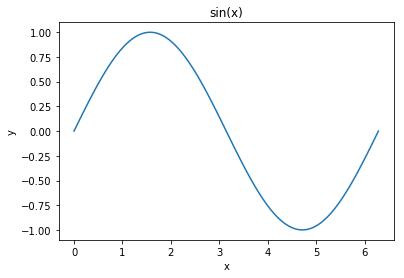

In [19]:
# Finally, plot the sin.  Here, I'm importing a module called matplotlib.pyplot and I will refer to it hereon
# as `plt.'
import matplotlib.pyplot as plt
# Make a 2D x-y plot
plt.plot(x, sinx)
# Label my axes and give the plot a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x)')
# Now show it to the user
plt.show()

# Functions

Typically we do not want monolithic codes because they are hard to maintain and repurpose.  Consequently, we write functions.  While it is _always_ recommended to use pre-made functions from a library it sometimes will be necessary to roll your own.  For example, if I need a function that computes

$$
  y = 2*x + 1
$$

I could write

In [21]:
def twoXPlus1(x):
    """
    Computes y = 2*x + 1.
    
    Parameters
    ----------
    x : array_like
    array for which y = 2*x + 1 will be computed.
    
    Returns
    -------
    y : array_like 
    The result y = 2*x + 1.
    """
    y = 2*x + 1
    #print("The result: ", y)
    return y

In [22]:
# An example of calling twoXPlus1
from numpy import ones
x = ones(4)
# An example of getting the documentation
print(twoXPlus1.__doc__)
y = twoXPlus1(x)
print("y=", y)


    Computes y = 2*x + 1.
    
    Parameters
    ----------
    x : array_like
    array for which y = 2*x + 1 will be computed.
    
    Returns
    -------
    y : array_like 
    The result y = 2*x + 1.
    
y= [ 3.  3.  3.  3.]


# Python Basics - A Stressful Example

Here, some NumPy functionality is introduced by following along with example 2.1.3 of Shearer. 

In [23]:
from numpy import matrix
from numpy import array
from numpy import dot
from numpy.linalg import eig
from numpy.linalg import norm
from numpy import sqrt, sin, cos
from math import pi
from math import atan2
# A matrix is an array of arrays stored row-wise.  Shearer 2.1.3
# tau = [-40 -10]
#       [-10 -60]
tau = matrix([[-40, -10], [-10, -60]])
print("The stress tensor is:\n", tau)
# Compute the traction vector for a fault oriented 45 degrees (clockwise) from the x-axis.
# That is 45 + 90 degrees (clockwise) from the y axis.
strike = 135.0 
strikeRad = strike*pi/180.0 # trigonmetric functions work in radians
f = matrix([[sin(strikeRad)], [cos(strikeRad)]])
# The book's unstated convention is to make +n always have a positive +East component.
# The normal is the parallel rotated 90 degrees.  A rotation matrix is given by:
# R = [ cos(theta)  -sin(theta)]
#     [ sin(theta)   cos(theta)]
# When evaluated at pi/2 this rotation matrix reduces to 
# R = [ 0 -1]
#     [ 1  0]
R = matrix([ [0, -1], [1, 0]] ) # In the homework to achieve a +E normal use a -90 degree rotation matrix
n = R*f 
# Compute the traction vector
tractionVec = tau*n
print("The traction vector is given by:\n", tractionVec)
faultNormalCompressiveStress = -dot(tractionVec.T, n)[0,0] # Negative b/c it needs to point inward
faultShearStress = dot(tractionVec.T, f)[0,0] # Solution manual in homework will take absolute value
print("The fault normal compressive stress is:", faultNormalCompressiveStress, "MPa")
print("The shear stress is:", faultShearStress, "MPa")
# Compute the eigenvalues and eigenvectors (this is equation 2.5 where the roots of some
# quadratic equation must be determined and the corresonding eigenvectors solved for). 
# Numerically, what is computed is much different than what you were taught in math class.
eigVal, eigVec = eig(tau)
idx = abs(eigVal).argsort()[::-1] # sort eigenvalues in descending order (based on magnitude)
eigVal = eigVal[idx]   # This will permute the eigenvalues into descending order and overwrite eigVal
eigVec = eigVec[:,idx] # This will permute the columns of the eigenvector matrix to match the eigenvalues
print("The eigenvalues are:\n", eigVal)
print("The corresponding eigenvectors are:\n", eigVec)
# Compute the angles from the x axis (see Fig 2.2).  
theta1 = atan2(eigVec[1,0], eigVec[0,0])*180.0/pi # Be careful in the homework - it wants East of North
theta2 = atan2(eigVec[1,1], eigVec[0,1])*180.0/pi # Be careful in the homework - it wants East of North
# The book desires the maximum stress angle.  That indicates it wants the eigenvalue with the largest
# absolute value.  Because they are sorted in descending order then this is the first eigenvalue.
print("The maximum compressive stress is at angle %f to the x axis."%theta1)

The stress tensor is:
 [[-40 -10]
 [-10 -60]]
The traction vector is given by:
 [[-35.35533906]
 [-49.49747468]]
The fault normal compressive stress is: 60.0 MPa
The shear stress is: 10.0 MPa
The eigenvalues are:
 [-64.14213562 -35.85786438]
The corresponding eigenvectors are:
 [[ 0.38268343  0.92387953]
 [ 0.92387953 -0.38268343]]
The maximum compressive stress is at angle 67.500000 to the x axis.


# Things your homework should have

1. The homework assignment
2. Your name
3. The date
4. Sections of code with comments (I won't grade or debug these based on style but I will skim through your logic)
5. Numbers and pictures of numbers
6. Written descriptions of numbers and pictures.  Writing _111.195_ without some words around it is pointless (though we will all come to learn that it is an approximation for the number of kilometers per degree).  

Here's an example:

## Homework 1
## Name: Thomas A. Anderson
## Date: 1/4/2017


In [24]:
# I'm curious what Azure's system info is - i should do this first
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)
